## Heart Desease Analysis

**Importing packages**

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

**Loading the data**

In [72]:
source = './data/heart_2020_cleaned.csv'
data = pd.read_csv(source)

## Exploring the data

### Column Details
* HeartDisease: Responders that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI). (Yes / No)

* BMI: Body Mass Index 

* Smoking: Responders that have smoked at least 100 ciagrettes in their lives (Yes / No)

* AlcoholDrinking: Adult men having more than 14 drinks per week and adult women having more than 7 drinks per week (Yes / No)

* Stroke: Repsonders that have had a stroke (Yes / No)

* PhysicalHealth: How many days during the last 30 days were the responders' physical health not good? (0-30 days)

* MentalHealth: How many days during the last 30 days was the responders' mental health not good? (0-30 days)

* DiffWalking: Responders have serious difficulty walking or climbing stairs? (Yes / No)

* Sex: Female or Male 

* AgeCategory: 13 age groups: '18-24', '25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'

* Race: 7 race groups: 'White', 'Black', 'Asian', 'American Indian/Alaskan Native','Other', 'Hispanic'

* Diabetic: Responders' status of diabetes: 'Yes','No'','No, borderline diabetes', 'Yes (during pregnancy)'

* PhysicalActivity: Responders that reported doing physical activity or exercise during the last 30 days other than their regular job. (Yes / No)

* GenHealth: Responders' evaluation their own health by 5 categories: 'Poor','Fair','Good','Very good','Excellent'

* SleepTime: On average, how many hours of sleep do the responders get in a 24-hour period

* Asthma: Responders that have had asthma? (Yes / No)

* KidneyDisease: Responders that have had kiney disease except kidney stones, bladder infection, or incontinence (Yes / No)

* SkinCancer: Responders that have had skin cancer? (Yes / No)


#### Categorical Features
* Binary categorical features: HeartDisease, Smoking, Stroke, Asthma, AlcoholDrinking, KidneyDisease , SkinCancer, PhysicalActivity, DiffWalking

* Ordinal categorical features: AgeCategory, GenHealth

* Nominal categorical features: Race, Diabetic

#### Numerical Features
* Continuous numerical features: BMI

* Discrete numerical features: PhysicalHealth,MentalHealth, SleepTime

## Visualization

#### Numerical Columns

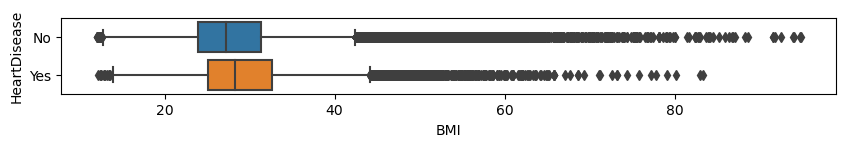

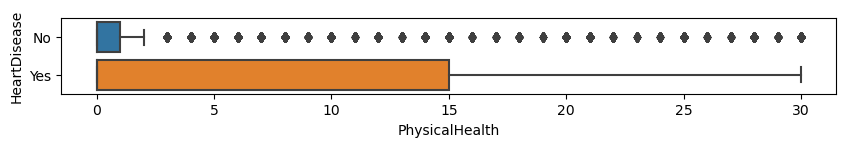

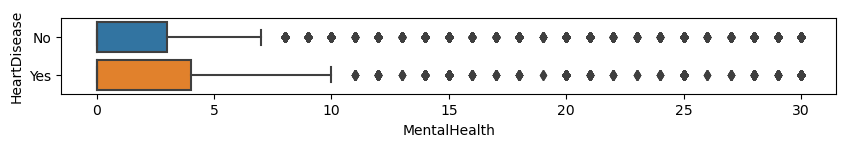

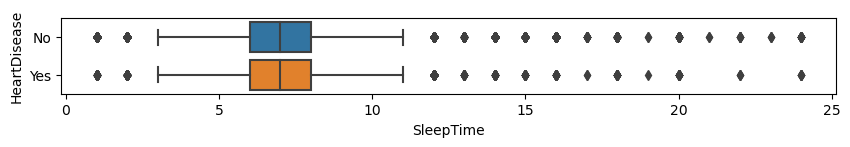

In [73]:
num_cols = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]
for i in range(0, len(num_cols)):
    plt.figure(figsize=(10,1), dpi=100)
    sns.boxplot(x=data[num_cols[i]], y = data["HeartDisease"])
    plt.show()

Boxplots show that there is no significant difference between people with and without heart diesease in BMI, Mental Health and Sleep Time. The only interesting thing we can see is the difference in Physical Health indicator. People with Heart disease struggle usually longer from physical illness and injury, than people without heart disease. 

#### Binary Columns

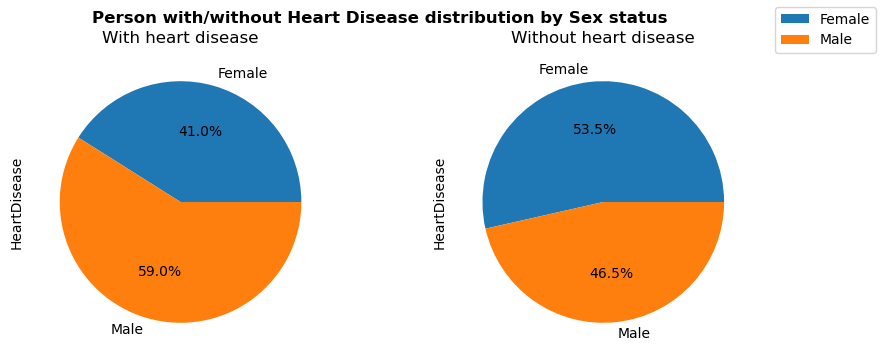

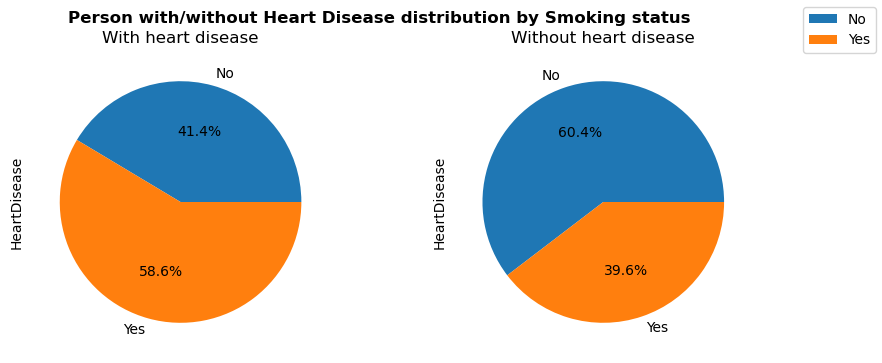

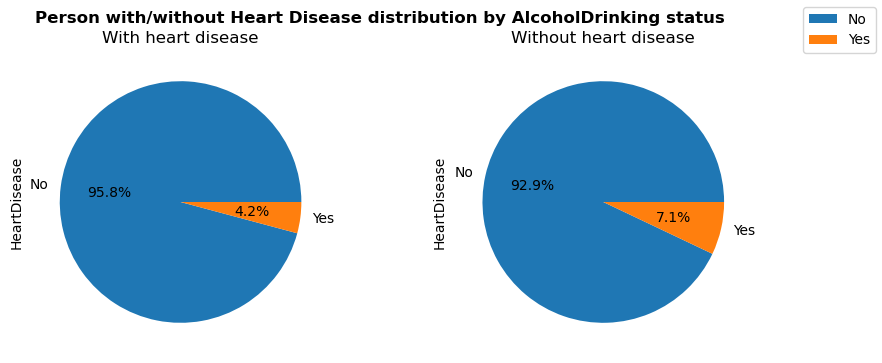

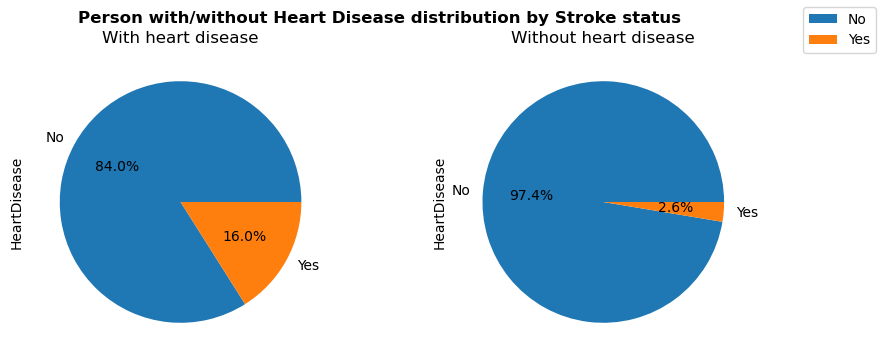

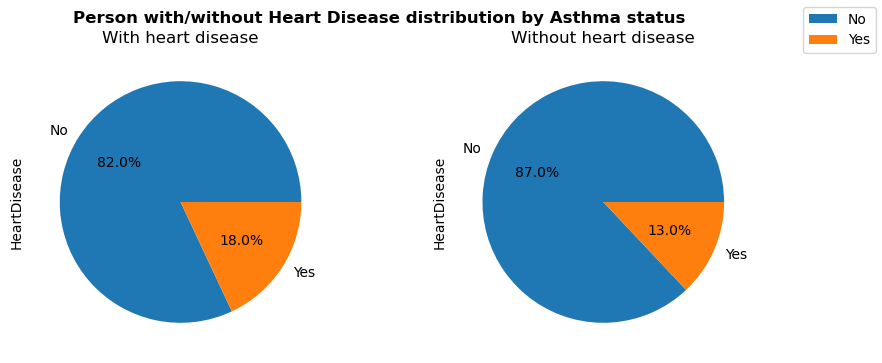

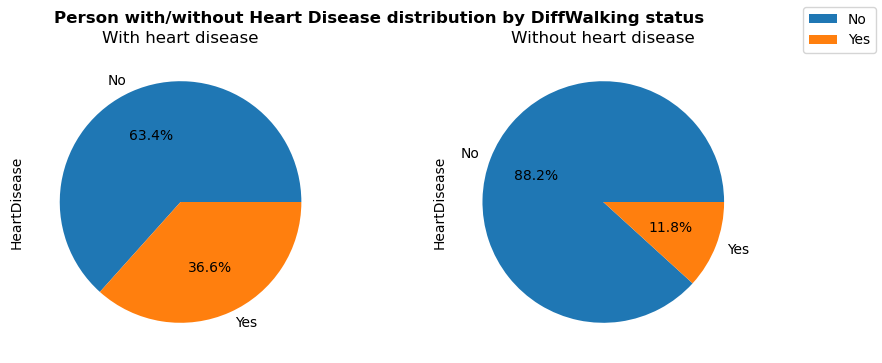

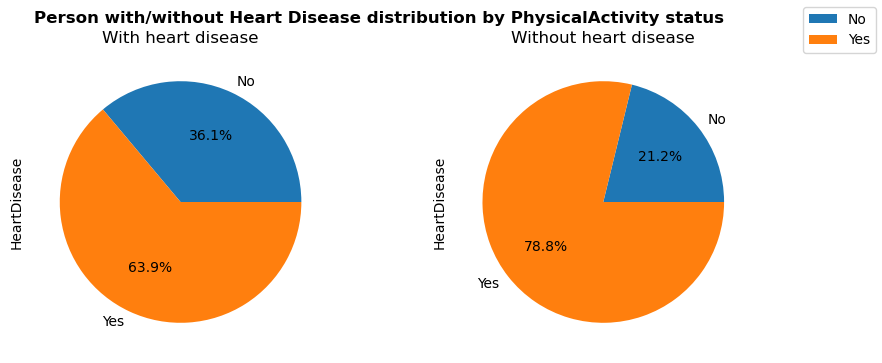

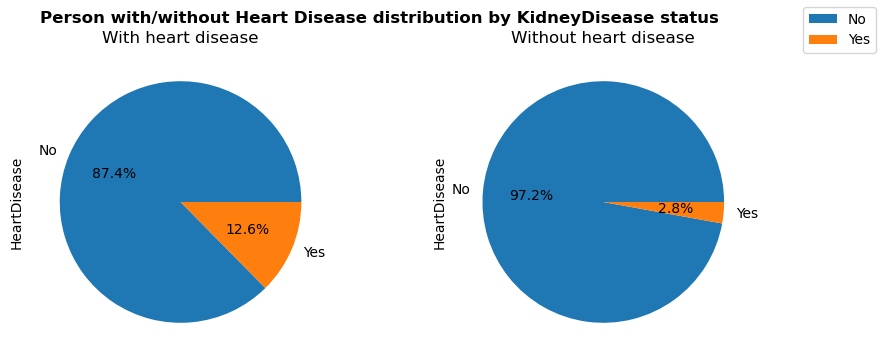

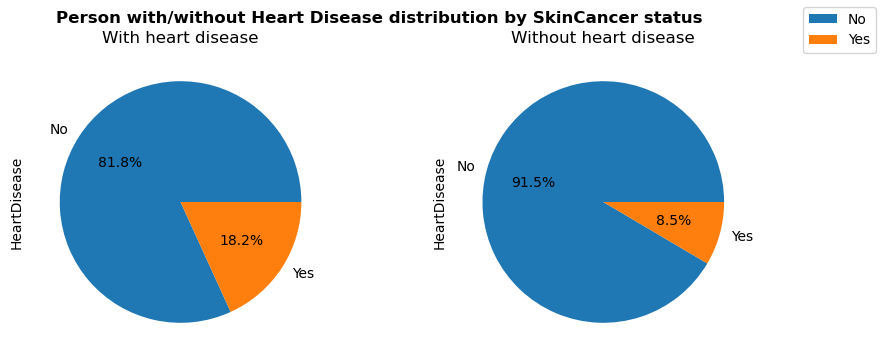

In [74]:
bin_cols = ['HeartDisease','Sex','Smoking','AlcoholDrinking','Stroke','Asthma', 'DiffWalking','PhysicalActivity','KidneyDisease','SkinCancer']
for i in range(1, len(bin_cols)):
    fig = plt.figure(figsize=(10, 4), dpi=100)
    
    ax1 = plt.subplot(1,2,1)
    data[data["HeartDisease"]=="Yes"].groupby(data[bin_cols[i]]).HeartDisease.count().plot(kind="pie",  autopct='%.1f%%')
    plt.title("With heart disease")
    
    plt.subplot(1,2,2)
    data[data["HeartDisease"]=="No"].groupby(data[bin_cols[i]]).HeartDisease.count().plot(kind="pie",  autopct='%.1f%%')
    plt.title("Without heart disease")

    plt.suptitle("Person with/without Heart Disease distribution by " + bin_cols[i] + " status", fontweight='bold')

    handles, labels = ax1.get_legend_handles_labels()

    leg = fig.legend(labels, loc = 'upper right', fancybox=True)


* After analysing the pie charts, we can conclude the following:

* Sex status: Males are more often exposed to heart diseases, than females.

* Smoking status: smokers are more often exposed to heart diseases, than non-smokers.

* Alkohol Drinking status: there is no visible difference between these two groups.

* Stroke status: people, who have had a stroke, have a higher chance to be exposed to heart diseases.

* Asthma status: there is no visible difference between these two groups.

* DiffWalking status: people who experience diffuculties walking are more ofthen exposed to heart diseases.

* Physical activity status: people, who do not exercise are more often exposed to heart diseases, but this consideration can be 
misleading, since the number of exercising people is high in both groups.

* Kidney disease status: people, who have had kidney disease are more ofthen exposed to heart diseases.

* Skin Cancer status: people, who have had skin cancer are more often exposed to heart diseases.


#### Categorical Columns

<Figure size 1200x400 with 0 Axes>

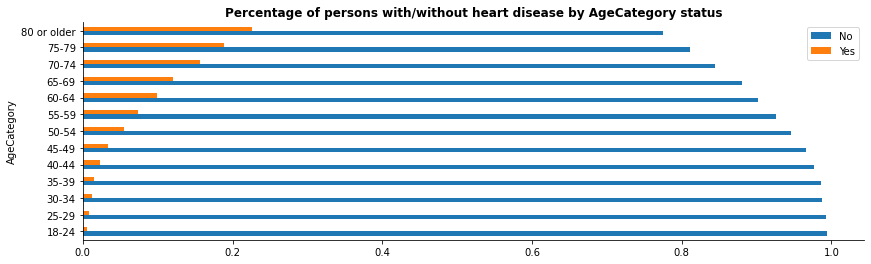

<Figure size 1200x400 with 0 Axes>

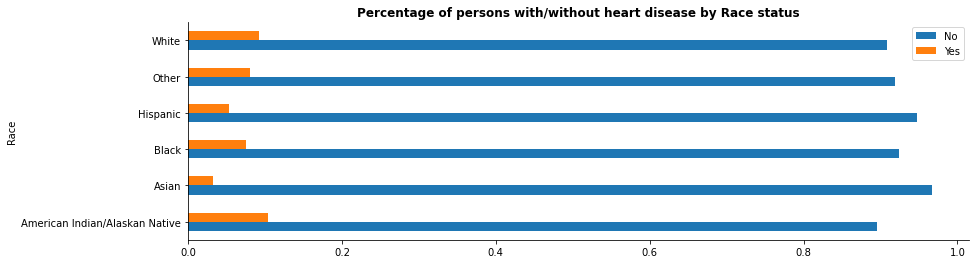

<Figure size 1200x400 with 0 Axes>

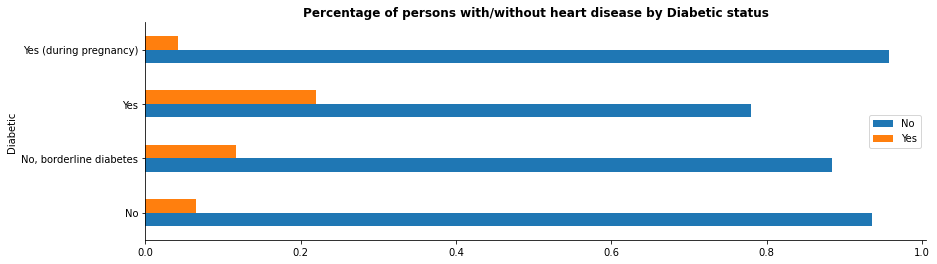

<Figure size 1200x400 with 0 Axes>

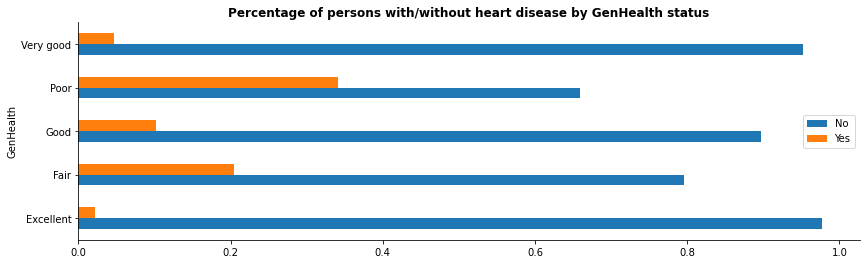

In [75]:
cat_cols = ['AgeCategory','Race','Diabetic','GenHealth']
for i in range(0, len(cat_cols)):
    plt.figure(figsize=(12, 4), dpi=100)
    crosstb = pd.crosstab(data[cat_cols[i]], data["HeartDisease"])
    crosstb['HD_NO_PERC'] = crosstb['No'] / (crosstb['No'] + crosstb['Yes'])
    crosstb['HD_YES_PERC'] = crosstb['Yes'] / (crosstb['No'] + crosstb['Yes'])
    
    crosstb = crosstb.drop(['Yes', 'No'], axis = 1)
    
    crosstb.plot(kind='barh', figsize=(60, 20))
    sns.despine()
    plt.gcf().set_size_inches(14, 4)
    plt.legend(labels=labels)
    plt.title("Percentage of persons with/without heart disease by " + cat_cols[i] + " status", fontweight='bold')
    


* The first graph shows us, that there is a strong linear relationship between age and heart diseases.

* The second graph doesn't deliver clear information about the relationship between race and heart diseases, except that asian people are least of all exposed to heart diseases.

* The third graph shows us a clearly, that people with diabetes are more likely to be exposed to heart diseases. The reason, why the group with diabetes during pregnancy has the least cases of heart diseases may be, that in this group are only women, who are generally less exposed to this kind of diseases.

* The forth graph shows us a strong linear relationship between general health and heart diseases. 

## Transforming Variables

In [76]:
try:
    data['Diabetic'].replace('Yes', 2, inplace=True)
    data['Diabetic'].replace('No, borderline diabetes', 1, inplace=True)
    data['Diabetic'].replace('Yes (during pregnancy)', 0, inplace=True)#because it is only a temporary condition, which is in most cases gone after pregnancy
    data['Diabetic'].replace('No', 0, inplace=True)
except:
    pass
try:
    data.replace('Yes', 1, inplace=True) 
    data.replace('No', 0, inplace=True)
    data.replace('Male', 1, inplace=True)
    data.replace('Female', 0, inplace=True)
except:
    pass

try: #Label Encoding
    data.replace('Excellent', 4, inplace=True)
    data.replace('Very good', 3, inplace=True)
    data.replace('Good', 2, inplace=True)
    data.replace('Fair', 1, inplace=True)
    data.replace('Poor', 0, inplace=True)
except:
    pass
le = LabelEncoder()
data['AgeCategory'] = le.fit_transform(data['AgeCategory'])
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df_race = pd.DataFrame(encoder.fit_transform(data[['Race']]).toarray())
encoder_df_race.columns = ['Native_American', 'Asian', 'Black', 'Hispanic', 'Other', 'White']

data = pd.concat([data, encoder_df_race], axis=1)

data.drop('Race', axis=1, inplace=True)



#### Normalizing the data

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
names = data.columns
d = scaler.fit_transform(data)
scaled_df = pd.DataFrame(d, columns=names)

#### Balancing the data

In [78]:
class_0 = scaled_df[scaled_df['HeartDisease']==0]
class_1 = scaled_df[scaled_df['HeartDisease']==1]
class_1 = class_1.sample(len(class_0), replace=True)
balanced_df = pd.concat([class_0, class_1], axis=0)
balanced_df['HeartDisease'].value_counts()

0.0    292422
1.0    292422
Name: HeartDisease, dtype: int64

#### Let's check the correlation of the variables

In [79]:
balanced_df.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Native_American,Asian,Black,Hispanic,Other,White
HeartDisease,1.000000,0.089592,0.190386,-0.061820,0.230503,0.243818,0.048942,0.290327,0.125126,0.442495,...,0.012740,0.069351,0.184105,0.143450,0.015766,-0.062739,-0.018083,-0.068747,-0.004531,0.072194
BMI,0.089592,1.000000,0.015914,-0.033913,0.022314,0.122210,0.071267,0.199105,0.025758,-0.030066,...,-0.042938,0.108830,0.072497,-0.038613,0.014542,-0.065454,0.074307,0.016674,0.017128,-0.047324
Smoking,0.190386,0.015914,1.000000,0.088259,0.075967,0.129143,0.085292,0.132433,0.112616,0.131215,...,-0.020388,0.034685,0.035133,0.034848,0.035672,-0.057421,-0.035941,-0.077569,0.012496,0.073025
AlcoholDrinking,-0.061820,-0.033913,0.088259,1.000000,-0.021530,-0.022820,0.044585,-0.044246,0.002017,-0.083989,...,-0.001173,-0.007475,-0.035686,-0.010613,-0.005350,-0.014949,-0.023811,-0.004424,0.006625,0.021280
Stroke,0.230503,0.022314,0.075967,-0.021530,1.000000,0.174166,0.080421,0.205483,-0.000027,0.140401,...,0.006869,0.062645,0.110958,0.044948,0.033700,-0.015333,0.035130,-0.020171,0.018305,-0.023067
PhysicalHealth,0.243818,0.122210,0.129143,-0.022820,0.174166,1.000000,0.321435,0.455528,-0.041182,0.117919,...,-0.069600,0.139512,0.176224,0.044157,0.027629,-0.039003,0.010037,-0.008488,0.023993,-0.007659
MentalHealth,0.048942,0.071267,0.085292,0.044585,0.080421,0.321435,1.000000,0.191319,-0.111160,-0.144347,...,-0.123799,0.123206,0.056845,-0.030388,0.027854,-0.019672,0.022479,0.024109,0.035907,-0.047695
DiffWalking,0.290327,0.199105,0.132433,-0.044246,0.205483,0.455528,0.191319,1.000000,-0.077529,0.245566,...,-0.035176,0.138065,0.187646,0.065239,0.037434,-0.046284,0.040010,-0.012212,0.011911,-0.019318
Sex,0.125126,0.025758,0.112616,0.002017,-0.000027,-0.041182,-0.111160,-0.077529,1.000000,0.003303,...,0.006788,-0.090553,-0.010179,0.055733,-0.010287,0.007911,-0.057269,-0.024787,-0.000566,0.052141
AgeCategory,0.442495,-0.030066,0.131215,-0.083989,0.140401,0.117919,-0.144347,0.245566,0.003303,1.000000,...,0.119585,-0.050948,0.140750,0.264120,-0.024479,-0.088942,-0.050939,-0.170443,-0.061421,0.203847


Variables with a strong correlation (above 0,1):
* Smoking
* Stroke
* PhysicalHealth
* DiffWalking
* Sex
* AgeCategory
* Diabetic
* PhysicalActivity
* GenHealth
* KidneyDisease
* SkinCancer

Since BMI also has a high correlation with our response variable, I will include it in the model.

## Machine Learning

First we want to choose variables, which we should include in the model. Let us try to include only variables with strong correlation. 

* First I will split the data in relation 80% train data, 20% test data.

In [80]:
features = balanced_df[['Smoking', 'Stroke', 'PhysicalHealth', 'DiffWalking', 'Sex',
                        'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth',
                        'KidneyDisease', 'SkinCancer', 'BMI']]
label = balanced_df['HeartDisease']
feat_train, feat_test, lab_train, lab_test = train_test_split(features, label, test_size=0.2, random_state=123) 

#### Decision Tree Classifier

Recall_score: 0.9869562248173188


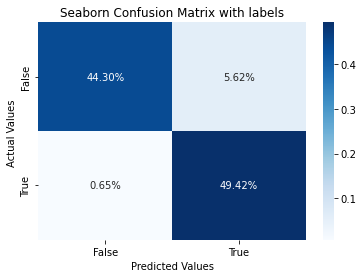

In [81]:
tree = DecisionTreeClassifier(random_state=123)
tree.fit(feat_train, lab_train)
predict_tree = tree.predict(feat_test)
cm = confusion_matrix(lab_test, predict_tree)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues', fmt='.2%')
ax.set_title('Seaborn Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
print(f'Recall_score: {recall_score(lab_test,predict_tree)}')

#### Random Forest Classifier

Recall_score: 0.988765963258895


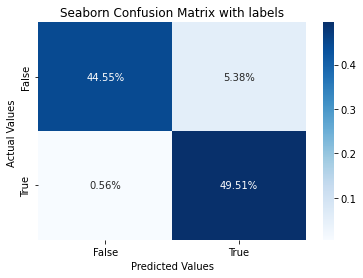

In [82]:
ram_for = RandomForestClassifier(n_estimators=100)
ram_for.fit(feat_train, lab_train)
predict_ram_for = ram_for.predict(feat_test)
cm = confusion_matrix(lab_test, predict_ram_for)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues', fmt='.2%')
ax.set_title('Seaborn Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
print(f'Recall_score: {recall_score(lab_test,predict_ram_for)}')

#### KNN Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(feat_train, lab_train)
predict_knn = knn.predict(feat_test)
cm = confusion_matrix(lab_test, predict_knn)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues', fmt='.2%')
ax.set_title('Seaborn Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
print(f'Recall_score: {recall_score(lab_test,predict_knn)}')

#### Logistic Regression

In [ ]:
log = LogisticRegression(random_state=123)
log.fit(feat_train, lab_train)
predict_log = log.predict(feat_test)
cm = confusion_matrix(lab_test, predict_log)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues', fmt='.2%')
ax.set_title('Seaborn Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
print(f'Recall_score: {recall_score(lab_test,predict_log)}')

## Conclusion

* As you can see, random forest classifier performs best with recall 98.9%.

**Why do we use recall metric for evaluation?**

Because false negatives are more costly for the classification. (If somebody has heart disease and we make a wrong classification, it can be a deplorable mistake, which can coast a life. If we classify a healthy person as a person with heart disease, it is not so terrible, because the person will anyways be further examined)